**1. The raw data files and their format**

In [ ]:
# Getting the current path name of the current working directory
!pwd

# List all files and folders in the main directory
!ls

/content
miles-driven.csv  road-accidents.csv  sample_data


In [ ]:
# Viewing first 30 lines of road-accidents.csv
!head -n 30 road-accidents.csv

##### LICENSE #####
# This data set is modified from the original at fivethirtyeight (https://github.com/fivethirtyeight/data/tree/master/bad-drivers)
# and it is released under CC BY 4.0 (https://creativecommons.org/licenses/by/4.0/)
##### COLUMN ABBREVIATIONS #####
# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)
# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)
# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)
# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)
##### DATA BEGIN #####
state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time
Alabama|18.8|39|30|80
Alaska|18.1|41|25|94
Arizona|18.6|35|28|96
Arkansas|22.4|18|26|95
California|12|35|28|89
Colorado|13.6|37|28|95
Connecticut|10.8|46|36|82
Delaware|16.2|38|30|99
District of Co

In [ ]:
# Viewing first 30 lines of miles-driven.csv
!head -n 30 miles-driven.csv

state|million_miles_annually
Alabama|64914
Alaska|4593
Arizona|59575
Arkansas|32953
California|320784
Colorado|46606
Connecticut|31197
Delaware|9028
District of Columbia|3568
Florida|191855
Georgia|108454
Hawaii|10066
Idaho|15937
Illinois|103234
Indiana|76485
Iowa|31274
Kansas|30021
Kentucky|48061
Louisiana|46513
Maine|14248
Maryland|56221
Massachusetts|54792
Michigan|94754
Minnesota|56685
Mississippi|38851
Missouri|68789
Montana|11660
Nebraska|19093
Nevada|24189


**2. Read in and get an overview of the data**

In [ ]:
# Import the `pandas` module as "pd"
import pandas as pd

# Read in `road-accidents.csv`
RoadAcc = pd.read_csv('road-accidents.csv', comment = '#', sep = '|')
RoadAcc.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [ ]:
# Save the number of rows columns as a tuple
print("Number of Rows and Columns in the selected dataset: ",RoadAcc.shape, "\n")

# Generate an overview of the DataFrame
print("Info about our data:\n")
print(RoadAcc.info())

Number of Rows and Columns in the selected dataset:  (51, 5) 

Info about our data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


In [ ]:
# Display the last five rows of the DataFrame
RoadAcc.tail()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


**3. Create a textual and a graphical summary of the data**

In [ ]:
# import seaborn and make plots appear inline
import seaborn as sns

# Compute the summary statistics of all columns in the `car_acc` DataFrame
RoadAcc.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


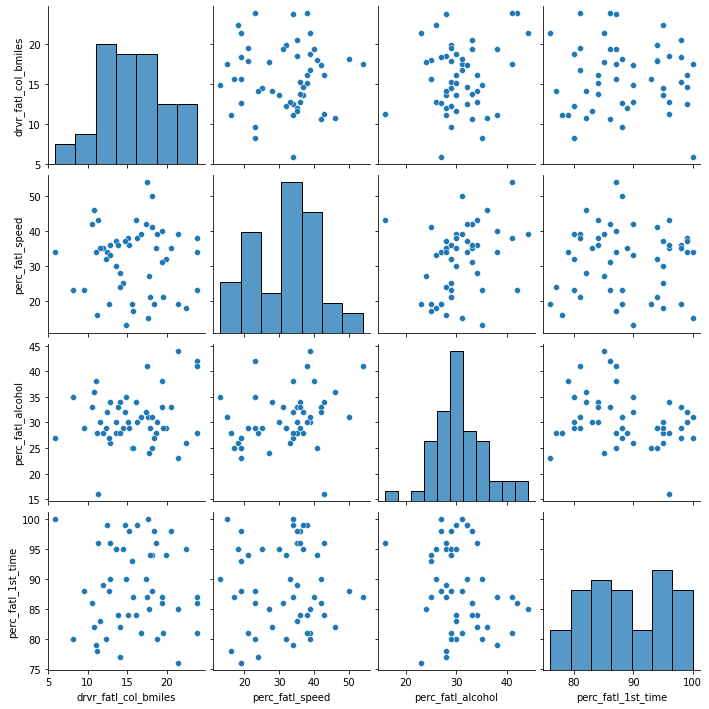

In [ ]:
# Create a pairwise scatter plot to explore the data
sns.pairplot(RoadAcc)

**4. Quantify the association of features and accidents**

In [ ]:
#Correlation coefficient for all columns
RoadAcc.corr()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


**5. Fit a multivariate linear regression**

In [ ]:
# Import the linear model function from sklearn
from sklearn.linear_model import LinearRegression

# Create the features(x) and target(y) DataFrames
x = RoadAcc[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
y = RoadAcc['drvr_fatl_col_bmiles']

# Create a linear regression object
lr = LinearRegression()

# Fit a multivariate linear regression model
lr.fit(x, y)

# Retrieve the regression coefficients
lr.coef_


array([-0.04180041,  0.19086404,  0.02473301])

**6. Perform PCA on standardized data**

Cumulative variance of first two principal components:  0.7946978608104822


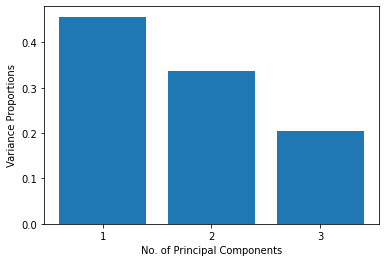

In [ ]:
# Standardize and center the feature(x) columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(x)

# Import the PCA class function from sklearn
from sklearn.decomposition import PCA
pca = PCA()

# Fit the standardized data to the pca
pca.fit(scaledX)

# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('No. of Principal Components')
plt.ylabel('Variance Proportions')
plt.xticks([1, 2, 3])

# Compute the cumulative proportion of variance explained by the first two principal components
VarianceTwoComps = pca.explained_variance_ratio_.cumsum()[1]
print("Cumulative variance of first two principal components: ", VarianceTwoComps)

In [ ]:
# Transform the scaled features using two principal components
pca = PCA(n_components=2)
PrincipalComps = pca.fit_transform(scaledX)

**7. Visualize the first two principal components**

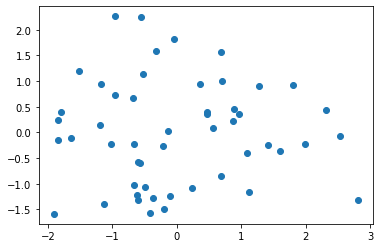

In [ ]:
# Extract the first and second component to use for the scatter plot
Comp1 = PrincipalComps[:,0]
Comp2 = PrincipalComps[:,1]

# Plot the first two principal components in a scatter plot
plt.scatter(Comp1,Comp2)

**8. Find clusters of similar states in the data**

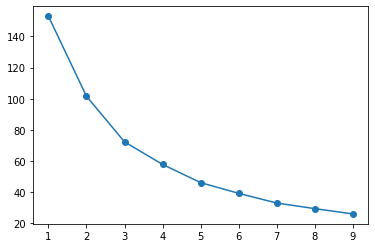

In [ ]:
from sklearn.cluster import KMeans

# loop to plot explanatory power for up to 10 KMeans clusters
nK = range(1, 10)
inertias = []
for k in nK:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(scaledX)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(nK, inertias, marker='o')

**9. KMeans to visualize clusters in the PCA scatter plot**

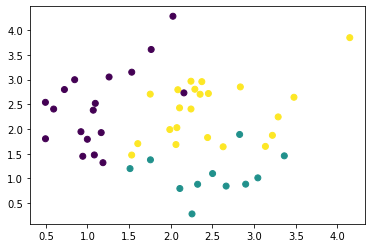

In [ ]:
# Create a KMeans object with 3 clusters, use random_state=8 
km = KMeans(n_clusters=3, random_state=8)

# Fit the data to the `km` object
PrincipalComps = km.fit_transform(scaledX)

#First two principal components
plt.scatter(PrincipalComps[:,0], PrincipalComps[:,1], c=km.labels_)

**10. Visualize the feature differences between the clusters**

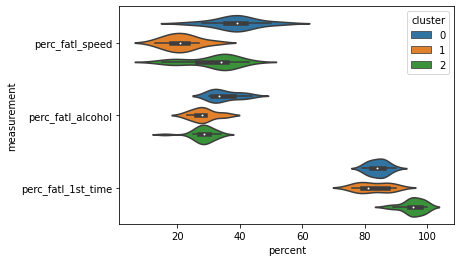

In [ ]:
# Create a new column with the labels from the KMeans clustering
RoadAcc['cluster'] =  km.labels_

# Reshape the DataFrame to the long format
melt_car = pd.melt(RoadAcc, id_vars="cluster", var_name="measurement", value_name="percent", value_vars=x)

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(x=melt_car["percent"], y=melt_car["measurement"], hue=melt_car["cluster"])

**11. Compute the number of accidents within each cluster**

,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


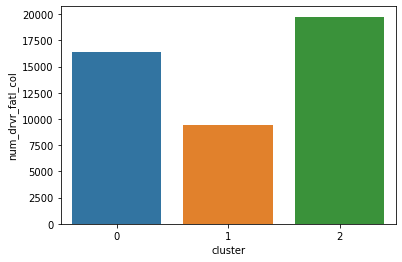

In [ ]:
# Read in the new dataset
miles_driven = pd.read_csv('miles-driven.csv', sep='|')

# Merge the `car_acc` DataFrame with the `miles_driven` DataFrame
RoadAccMiles = pd.merge(RoadAcc, miles_driven, on="state")

# Create a new column for the number of drivers involved in fatal accidents
RoadAccMiles['num_drvr_fatl_col'] = RoadAccMiles['drvr_fatl_col_bmiles']*RoadAccMiles["million_miles_annually"]/1000

# Create a barplot of the total number of accidents per cluster
sns.barplot(x=RoadAccMiles["cluster"], y=RoadAccMiles["num_drvr_fatl_col"], data=RoadAccMiles, estimator=sum, ci=None)

# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum
RoadAccMiles.groupby("cluster")["num_drvr_fatl_col"].agg(["count", "mean", "sum"])

**12. Make a decision when there is no clear right choice**

Cluster 2 should be chosen for further investigation